# Transformation de Yeo-Johnson sur des variables numériques

La transformation de Yeo-Johnson est une extension de la transformation de Box-Cox et peut être utilisée sur des variables avec des valeurs nulles et négatives, ainsi que des valeurs positives. Ces transformations peuvent être définies comme suit:
* $\frac{(X+1)^λ-1 }{λ}$ ; si λ n'est pas 0 et X >= zéro
* $ln(X + 1 )$; si λ est nul et X >= zéro
* $\frac{(-X+1)^{2-λ}-1 }{2-λ}$ ;si λ n'est pas 2 et X est négatif
* $-ln(-X + 1)$; si λ est 2 et X est négatif

Dans cette recette, nous allons effectuer la transformation Yeo-Johnson en utilisant SciPy, scikit-learn et Feature-engine

In [2]:
! pip install feature_engine

     |████████████████████████████████| 179 kB 4.9 MB/s 
     |████████████████████████████████| 9.5 MB 46.9 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [4]:
import numpy as np
import pandas as pd

# for plotting
import matplotlib.pyplot as plt

# for Q-Q plots
import scipy.stats as stats

# the dataset for the demo
from sklearn.datasets import load_boston

# with open-source packages
from sklearn.preprocessing import PowerTransformer
from feature_engine.transformation import YeoJohnsonTransformer

In [5]:
# load the the Boston House price data from scikit-learn

# this is how we load the boston dataset from sklearn
boston_dataset = load_boston()

# create a dataframe with the independent variables
data = pd.DataFrame(boston_dataset.data,
                      columns=boston_dataset.feature_names)

# display top 5 rows (not in book)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


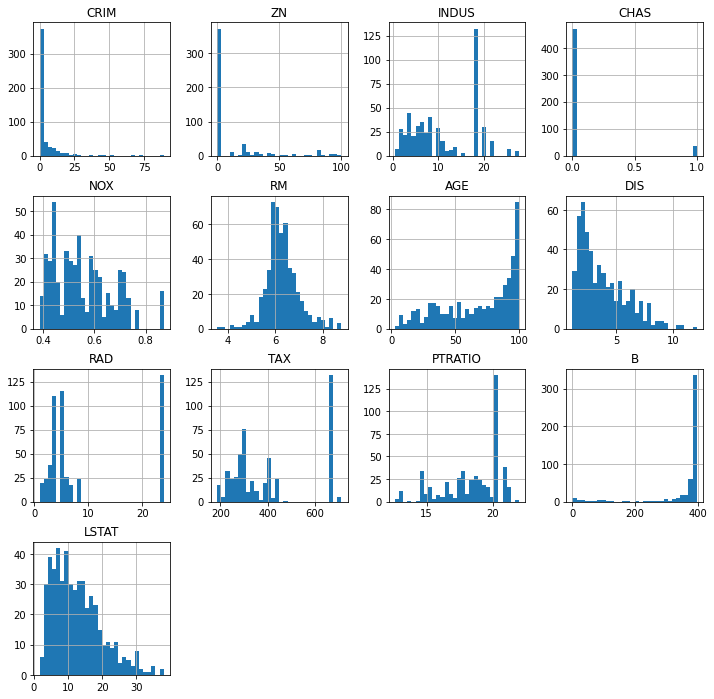

In [6]:
# plot the histogram to inspect variable distributions (not in book)

data.hist(bins=30, figsize=(12,12))
plt.show()

In [7]:

# plot histogram and Q-Q plots to have a look at the variable distribution
# (not included in the book for this recipe)

def diagnostic_plots(df, variable):
    
    # function to plot a histogram and a Q-Q plot
    # side by side, for a certain variable
    
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[variable].hist(bins=30)

    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)

    plt.show()

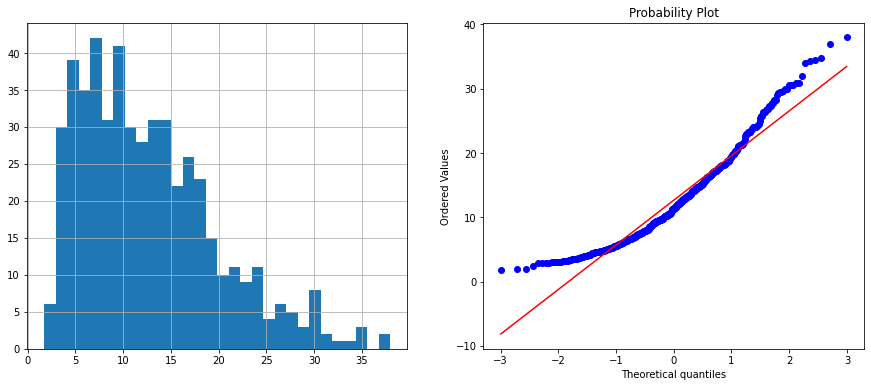

In [8]:
# check original distribution (not in book)

diagnostic_plots(data, 'LSTAT')

## Yeo-Johnson transformation with SciPy

In [9]:
# make a copy of the dataframe where we will store the modified
# variables

data_tf = data.copy()

Optimal λ:  0.15370552301825943


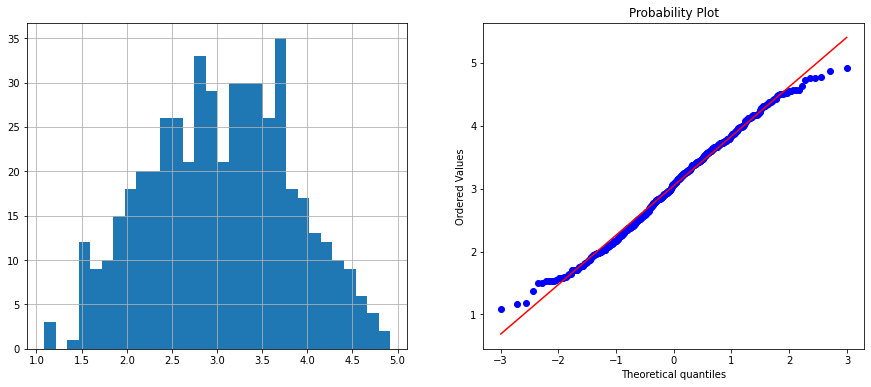

In [10]:
# apply the Yeo_johnson transformation to the variable LSTAT

data_tf['LSTAT'], param = stats.yeojohnson(data['LSTAT']) 

# print the optimal lambda selected for this variable
print('Optimal λ: ', param)

# visualize the transformation (not in book)
diagnostic_plots(data_tf, 'LSTAT')

## Ye-Johnson transformation with Scikit-learn

In [11]:
# initialize a transformer with yeo-johnson
transformer = PowerTransformer(method='yeo-johnson', standardize=False)

In [12]:
# select variables to transform in a list
cols = ['LSTAT', 'NOX', 'DIS', 'RM']

In [13]:
# fit transformer to the slice of data with the indicated variables
transformer.fit(data[cols])

PowerTransformer(copy=True, method='yeo-johnson', standardize=False)

In [14]:
# the transformer stores the learned lambdas in its attribute
transformer.lambdas_

array([ 0.15370552, -3.97371104, -0.44887192,  0.33298652])

In [15]:
# transform indicated variables
data_tf = transformer.transform(data[cols])

In [16]:
# capture NumPy array into dataframe
data_tf = pd.DataFrame(data_tf, columns=cols)

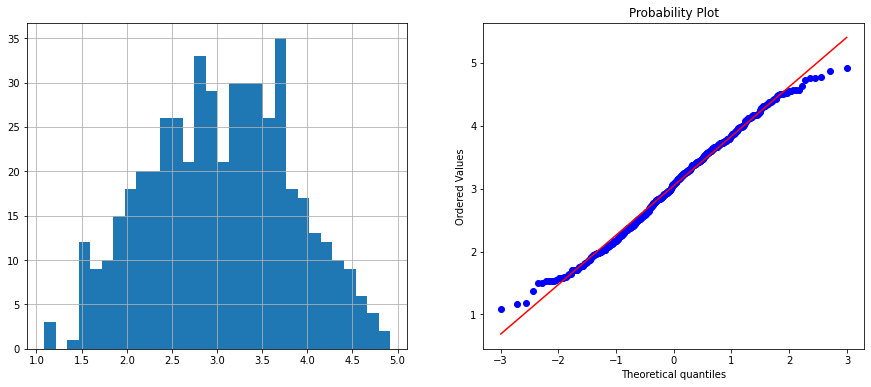

In [17]:
# plot the distribution (not in book)
diagnostic_plots(data_tf, 'LSTAT')

## Yeo-Johnson transformation with Feature-engine

In [18]:
# initialize the transformer with a subset of variables to transform
yjt = YeoJohnsonTransformer(variables = ['LSTAT', 'NOX', 'DIS', 'RM'])

# fit transformer to the dataframe
yjt.fit(data)

YeoJohnsonTransformer(variables=['LSTAT', 'NOX', 'DIS', 'RM'])

In [19]:
# transform indicated variables

data_tf = yjt.transform(data)

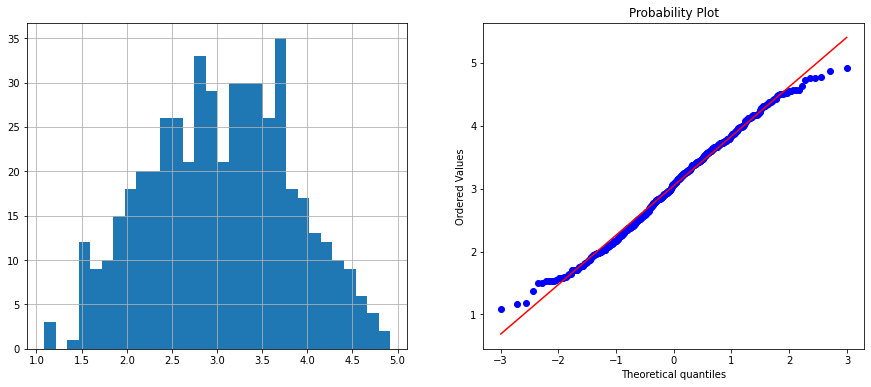

In [20]:

# make diagnostic plot of transformed variable (not in book)
diagnostic_plots(data_tf, 'LSTAT')

In [21]:

# the transformer stores the learned parameters for each variable
# in a dictionary as an attribute

yjt.lambda_dict_

{'DIS': -0.4488719212889845,
 'LSTAT': 0.15370552301825943,
 'NOX': -3.9737110448770623,
 'RM': 0.3329865194470187}